In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

(1280, 1920, 3)
150
(100, 150, 3)


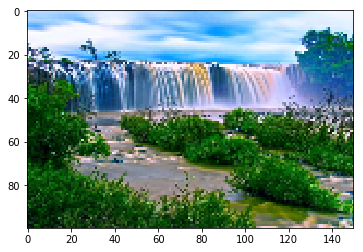

In [2]:
im = cv2.imread('./image.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
print(im.shape)
new_r = 100
new_c = int((float(im.shape[1])/im.shape[0])*new_r)
print(new_c)

img = cv2.resize(im, (new_c, new_r))
print(img.shape)
plt.imshow(img)
plt.show()

In [3]:
data = np.reshape(img, (-1, 3))
print(data.shape)

(15000, 3)


In [4]:
print(data.dtype)

uint8


In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(n_clusters=8)

In [7]:
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
centroids = np.array(km.cluster_centers_, dtype=np.uint8)
print(centroids.shape)
print(centroids)

(8, 3)
[[ 34  94  21]
 [ 85 182 250]
 [226 231 247]
 [ 38  93 137]
 [ 96 122  68]
 [  7  52   7]
 [141 145 152]
 [171 203 241]]


In [9]:
print(km.labels_.shape)
print(km.labels_.dtype)
freq = np.unique(km.labels_, return_counts=True)
print(freq)

(15000,)
int32
(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([2397,  773, 1814, 1594, 1086, 3290, 2191, 1855]))


In [10]:
label_id = freq[0][freq[1].argmax()]
print(label_id)
most_dom_color = centroids[label_id]
print(most_dom_color)

display_stamp = np.zeros((20,20,3), dtype=np.uint8)
display_stamp[:, :, :] = 255 - most_dom_color

5
[ 7 52  7]


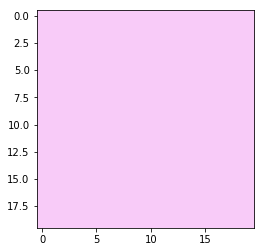

In [11]:
plt.imshow(display_stamp)
plt.show()

In [12]:
freq_counts = freq[1]
print(freq_counts)
print(freq_counts.sum())

freq_ratio = freq_counts/float(freq_counts.sum())
print(freq_ratio)

[2397  773 1814 1594 1086 3290 2191 1855]
15000
[0.1598     0.05153333 0.12093333 0.10626667 0.0724     0.21933333
 0.14606667 0.12366667]


In [13]:
info = []
for ix in range(freq_ratio.shape[0]):
    item = (centroids[ix], freq_ratio[ix])
    info.append(item)
    
for cx in info:
    print(cx)

(array([34, 94, 21], dtype=uint8), 0.1598)
(array([ 85, 182, 250], dtype=uint8), 0.051533333333333334)
(array([226, 231, 247], dtype=uint8), 0.12093333333333334)
(array([ 38,  93, 137], dtype=uint8), 0.10626666666666666)
(array([ 96, 122,  68], dtype=uint8), 0.0724)
(array([ 7, 52,  7], dtype=uint8), 0.21933333333333332)
(array([141, 145, 152], dtype=uint8), 0.14606666666666668)
(array([171, 203, 241], dtype=uint8), 0.12366666666666666)


In [14]:
sorted_info = sorted(info, key=lambda z:z[1], reverse=True)
for cx in sorted_info:
    print(cx)

(array([ 7, 52,  7], dtype=uint8), 0.21933333333333332)
(array([34, 94, 21], dtype=uint8), 0.1598)
(array([141, 145, 152], dtype=uint8), 0.14606666666666668)
(array([171, 203, 241], dtype=uint8), 0.12366666666666666)
(array([226, 231, 247], dtype=uint8), 0.12093333333333334)
(array([ 38,  93, 137], dtype=uint8), 0.10626666666666666)
(array([ 96, 122,  68], dtype=uint8), 0.0724)
(array([ 85, 182, 250], dtype=uint8), 0.051533333333333334)


In [15]:
print len(sorted_info)
print(sorted_info[3][0])

SyntaxError: invalid syntax (<ipython-input-15-614bd632e9b7>, line 1)

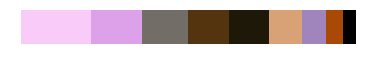

In [16]:
print_matrix = np.ones((10,100,3), dtype=np.uint8)
start = 0
for ix in range(len(sorted_info)):
    color = sorted_info[ix][0]
    width = int(sorted_info[ix][1]*print_matrix.shape[1])
    end = start + width
    print_matrix[:, start:end, :] = 255 - color
    start = end
    plt.axis('off')
    plt.imshow(print_matrix)
plt.show()